# Факторный анализ

## Задание

1. Выбрать массив данных (ссылки № 3-4 из списка литературы),
описать параметры.
2. Стандартизировать переменные. Провести корреляционный анализ,
сформулировать предположения о наличии скрытых факторов.
3. Провести дескриптивный анализ, оценить близость выборок к
нормальной.
4. Изучить пример решения задачи (ссылки №2, 5-10 из списка
литературы).
5. Определить факторы методом главных компонент.
6. Изменить факторные нагрузки методом вращения.
7. Определить количество факторов с помощью критерия каменистой
осыпи и критерия Кайзера.
8. Интерпретировать результаты.
9. Оформить отчет.

## Цель работы

Изучение методов факторного анализа.

## Содержание отчета

1. Титульный лист.
2. Цель работы.
3. Описание исходных данных.
4. Результаты дескриптивного анализа.
5. Корреляционный анализ.
6. Матрица факторных нагрузок до и после применения методов
вращения. Диаграммы рассеяния для факторов.
7. График каменистой осыпи.
8. Интерпретация результатов.


# Выполнение работы

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from scipy.stats import spearmanr
from factor_analyzer import FactorAnalyzer, Rotator
%matplotlib inline

ALPHA = 0.05

## Датасет

Загрузим данные из файла "heart.csv" с датасетом, также выведем информацию о данных и посмотрим первые 5 наблюдений из датасета

In [2]:
data = pd.read_csv('heart.csv')
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalach   303 non-null    int64
 8   exang     303 non-null    int64
 9   target    303 non-null    int64
dtypes: int64(10)
memory usage: 23.8 KB


(None,
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  target
 0   63    1   3       145   233    1        0      150      0       1
 1   37    1   2       130   250    0        1      187      0       1
 2   41    0   1       130   204    0        0      172      0       1
 3   56    1   1       120   236    0        1      178      0       1
 4   57    0   0       120   354    0        1      163      1       1)

### Описание данных


* **age** — возраст пациента
* **sex** — пол пациента (1 = мужчина, 0 = женщина)
* **cp** — тип боли в груди (1 = типичная стенокардия, 2 = атипичная стенокардия, 3 = другой вид боли, 4 = нет боли)
* **trestbps** — артериальное давление в состоянии покоя (мм ртутного столба, на момент госпитализации)
* **chol** — уровень холестерола (мг/дл)
* **fbs** — уровень сахара крови натощак выше 120 мг/дл (1 = да, 0 = нет)
* **restecg** — результат ЭКГ в состоянии покоя (0 = нормальный, 1 = абнормальный, 2 = признаки гипертрофии желудочка)
* **thalach** — максимальная зафиксированная частота сердцебиения
* **exang** — стенокардия в результате физической нагружки (1 = да, 0 = нет)
* **target** — наличие сердечно-сосудистого заболевания (1 = да, 0 = нет)

## Результаты дескриптивного анализа

Анализ был проведен в процессе выполнения лабораторной работы №1. Результатами стало выявления факта, что данные по большей своей части распределены не нормально. Некоторые атрибуты близки к нормальному распределению, но имеют некоторый сдвиг.

Выводы о нормальности атрибутов
1. Возраст (age):  
Шапиро-Уилка: нормальность отвергнута.  
Колмогорова-Смирнова: нормальность не отвергается.  
Вывод: Хотя тест Шапиро-Уилка отвергает нормальность, тест Колмогорова-Смирнова указывает на возможное приближение к нормальному распределению.  

2. Пол (sex):  
Атрибут sex не следует нормальному распределению.  

3. Тип боли в груди (cp):  
Данные по этому атрибуту не нормально распределены.  

4. Артериальное давление (trestbps):  
trestbps не следует нормальному распределению.  

5. Уровень холестерола (chol):  
Шапиро-Уилка: отвергает нормальность, но Колмогорова-Смирнова не отвергает.  
Неопределенное распределение, возможно, есть смещение.  

6. Уровень сахара в крови (fbs):  
fbs не нормально распределен.  

7. Результат ЭКГ в состоянии покоя (restecg):  
restecg не следует нормальному распределению.  

8. Максимальная зафиксированная частота сердцебиения (thalach):  
Шапиро-Уилка отвергает нормальность, но Колмогорова-Смирнова не отвергает.  
Возможно, есть какое-то смещение, но в целом данные не сильно отклоняются от нормального.  

9. Стенокардия в результате физической нагрузки (exang):  
exang не нормально распределен.  

Также результатами дескриптивного анализа было выявлено, что данные не содержат явных выбросов. Данные сбалансированы в пропорциях 55 к 45. То есть 55% всего датасета это наблюдения с положительным сердечно-сосудистым заболеванием и 45% датасета обратные наблюдения. Можно сделать вывод, что классы сбалансированы.


## Корреляционный анализ

Анализ был проведен в процессе выполнения лабораторной работы №1.

Корреляционный анализ применяется для измерения силы и направления взаимосвязи между переменными. В зависимости от типа данных выбираются разные методы анализа корреляции:

Для количественных переменных:  
1. Коэффициент корреляции Пирсона, если данные имеют нормальное распределение  
2. Коэффициент корреляции Спирмена, если данные распределены не нормально  
Для категориальных данных:  
Анализ связи можно выполнить с использованием коэффициентов, например, Крамера V.  

Статистически значимые зависимости обнаружены между полом и наличием сердечно-сосудистых заболеваний, типом боли в груди и наличием заболеваний, а также стенокардией при нагрузке и наличием заболеваний.  
Такие переменные, как уровень сахара в крови натощак (fbs) и результаты ЭКГ в состоянии покоя (restecg), не показали значимой связи с наличием сердечно-сосудистых заболеваний, что может указывать на то, что в данной выборке они не играют значимой роли в прогнозировании заболевания.  


In [3]:
quant_columns = ['age', 'trestbps', 'chol', 'thalach', 'target']

### Пирсона

In [4]:
pearson_corr = data[quant_columns].corr(method='pearson')
pearson_corr

,age,trestbps,chol,thalach,target
age,1.000000,0.279351,0.213678,-0.398522,-0.225439
trestbps,0.279351,1.000000,0.123174,-0.046698,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,0.421741
target,-0.225439,-0.144931,-0.085239,0.421741,1.000000


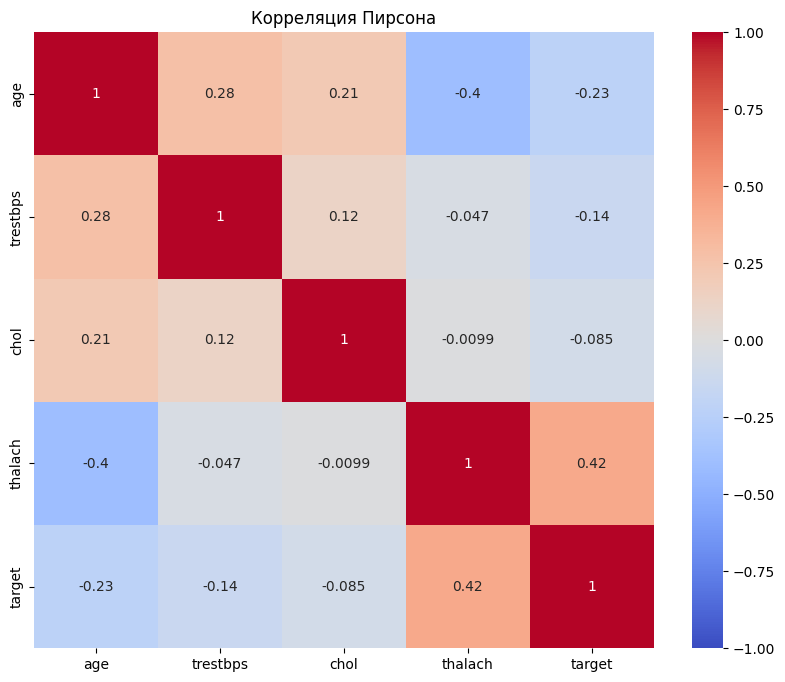

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция Пирсона')
plt.show()

### Спирмена

In [6]:
correlation_matrix = pd.DataFrame(index=quant_columns, columns=quant_columns)

for var1 in quant_columns:
    for var2 in quant_columns:
        if var1 != var2:
            corr, p_value = spearmanr(data[var1], data[var2])
            correlation_matrix.loc[var1, var2] = 'значима' if p_value < ALPHA else 'не значима'

spearman_corr = data[quant_columns].corr(method='spearman')
spearman_corr

,age,trestbps,chol,thalach,target
age,1.000000,0.285617,0.195786,-0.398052,-0.238400
trestbps,0.285617,1.000000,0.126562,-0.040407,-0.121593
chol,0.195786,0.126562,1.000000,-0.046766,-0.120888
thalach,-0.398052,-0.040407,-0.046766,1.000000,0.428370
target,-0.238400,-0.121593,-0.120888,0.428370,1.000000


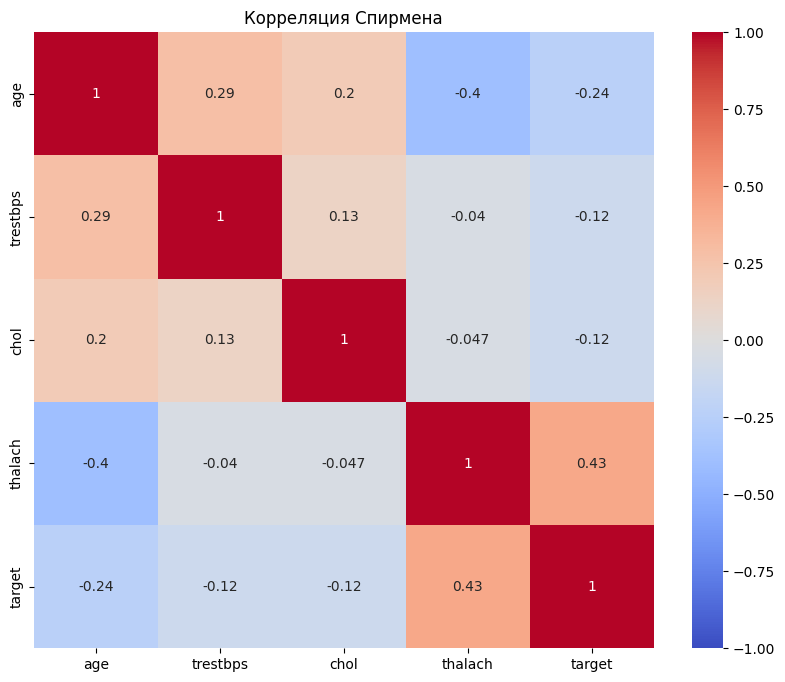

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция Спирмена')
plt.show()

In [8]:
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'target']

In [9]:
from scipy.stats import chi2_contingency

def cramers_v_with_significance(confusion_matrix):
    chi2, p_value, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
    return cramers_v, p_value

cramers_v_matrix = pd.DataFrame(index=cat_columns, columns=cat_columns)
cramers_p_value_matrix = pd.DataFrame(index=cat_columns, columns=cat_columns)

for col1 in cat_columns:
    for col2 in cat_columns:
        if col1 != col2:
            contingency_table = pd.crosstab(data[col1], data[col2])
            v, p = cramers_v_with_significance(contingency_table)
            
            cramers_v_matrix.loc[col1, col2] = v
            cramers_p_value_matrix.loc[col1, col2] = f'значима' if p < ALPHA else f'не значима'
        else:
            cramers_v_matrix.loc[col1, col2] = np.nan

cramers_v_matrix = cramers_v_matrix.astype(float)

cramers_v_matrix


,sex,cp,fbs,restecg,exang,target
sex,NaN,0.150050,0.035058,0.110464,0.134101,0.273814
cp,0.150050,NaN,0.113242,0.126437,0.471457,0.519223
fbs,0.035058,0.113242,NaN,0.087068,0.015771,0.018728
restecg,0.110464,0.126437,0.087068,NaN,0.099106,0.181878
exang,0.134101,0.471457,0.015771,0.099106,NaN,0.429692
target,0.273814,0.519223,0.018728,0.181878,0.429692,NaN


### Численные результаты

In [10]:
cramers_p_value_matrix

,sex,cp,fbs,restecg,exang,target
sex,NaN,не значима,не значима,не значима,значима,значима
cp,не значима,NaN,не значима,не значима,значима,значима
fbs,не значима,не значима,NaN,не значима,не значима,не значима
restecg,не значима,не значима,не значима,NaN,не значима,значима
exang,значима,значима,не значима,не значима,NaN,значима
target,значима,значима,не значима,значима,значима,NaN


In [11]:
correlation_matrix

,age,trestbps,chol,thalach,target
age,NaN,значима,значима,значима,значима
trestbps,значима,NaN,значима,не значима,значима
chol,значима,значима,NaN,не значима,значима
thalach,значима,не значима,не значима,NaN,значима
target,значима,значима,значима,значима,NaN


## Матрица факторных нагрузок до и после применения методов вращения. Диаграммы рассеяния для факторов.

### Препроцессинг

In [12]:
numeric_columns = ['age', 'trestbps', 'chol', 'thalach']
categorical_columns = ['cp', 'restecg']
binary_columns = ['sex', 'fbs', 'exang', 'target']

scaler = StandardScaler()
data_numeric_scaled = pd.DataFrame(
    scaler.fit_transform(data[numeric_columns]),
    columns=numeric_columns,
    index=data.index
)

ohe = OneHotEncoder(drop='first', sparse_output=False)
data_categorical_encoded = pd.DataFrame(
    ohe.fit_transform(data[categorical_columns]),
    columns=ohe.get_feature_names_out(categorical_columns),
    index=data.index
)

In [30]:
data_preprocessed = pd.concat([data_numeric_scaled, data_categorical_encoded, data[binary_columns]], axis=1)
data_preprocessed =  data_preprocessed.drop(columns=['target'])
data_preprocessed

,age,trestbps,chol,thalach,cp_1,cp_2,cp_3,restecg_1,restecg_2,sex,fbs,exang
0,0.952197,0.763956,-0.256334,0.015443,0.0,0.0,1.0,0.0,0.0,1,1,0
1,-1.915313,-0.092738,0.072199,1.633471,0.0,1.0,0.0,1.0,0.0,1,0,0
2,-1.474158,-0.092738,-0.816773,0.977514,1.0,0.0,0.0,0.0,0.0,0,0,0
3,0.180175,-0.663867,-0.198357,1.239897,1.0,0.0,0.0,1.0,0.0,1,0,0
4,0.290464,-0.663867,2.082050,0.583939,0.0,0.0,0.0,1.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,0.0,0.0,0.0,1.0,0.0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.0,0.0,1.0,1.0,0.0,1,0,0
300,1.503641,0.706843,-1.029353,-0.378132,0.0,0.0,0.0,1.0,0.0,1,1,0
301,0.290464,-0.092738,-2.227533,-1.515125,0.0,0.0,0.0,1.0,0.0,1,0,1


### Определение числа факторов

#### Теория происходящего

##### **Разебермся с тем, что такое дисперсия**

Дисперсия случайной величины — мера разброса значений случайной величины относительно её математического ожидания  
* Каждая переменная в наборе данных имеет свою собственную дисперсию (разброс значений).
* В многомерных данных, где есть множество переменных, мы можем измерить общую дисперсию, которая представляет собой суммарный разброс всех переменных.

##### **Что значит "объясненная дисперсия"?**

Объясненная дисперсия — это доля общей дисперсии данных, которая "объясняется" каждой главной компонентой. Она показывает, насколько каждая главная компонента отражает информацию, содержащуюся в исходных данных.


##### **Что такое факторы?**

Факторы — это не наблюдаемые переменные, которые мы пытаемся извлечь из данных. Они являются абстракциями, которые объясняют, как связаны между собой различные наблюдаемые переменные. Исходные факторы — это просто факторы, которые мы находим в процессе анализа, до того как применим вращение.  

Факторный анализ — это метод многомерного статистического анализа, который позволяет найти скрытые (латентные) переменные (или факторы), объясняющие корреляции между набором наблюдаемых переменных.  

**Пример:**  
Предположим, есть несколько переменных:

* age (возраст),
* chol (уровень холестерина),
* trestbps (артериальное давление),
* thalach (максимальная частота сердцебиения).

Эти переменные могут быть связаны друг с другом. Например, возраст и уровень холестерина могут быть связаны с сердечно-сосудистыми заболеваниями, а артериальное давление и частота сердцебиения — с уровнем физической активности. Однако они могут не быть независимыми друг от друга.

**Факторы** — это скрытые переменные, которые объясняют эти корреляции между переменными. В примере факторами могут быть такие вещи, как:

*Здоровье сердца* — который влияет на уровень холестерина, артериальное давление и частоту сердцебиения.  
*Возраст* — который также может влиять на эти переменные.

##### **PCA - Principal component analysis**

Цель метода - найти линейные комбинации исходных переменных (главные компоненты), которые:  
* Максимизируют объясненную дисперсию:  
    * Первая главная компонента (первая ось) объясняет максимальную возможную часть общей дисперсии данных.  
    * Вторая компонента объясняет максимальную оставшуюся дисперсию, но ортогональна (независима) от первой.  
* Позволяют представить данные в сжатой форме, сохраняя как можно больше информации о их вариативности.  

#### Применение PCA

In [31]:
pca = PCA()
pca.fit(data_preprocessed)
factor_scores = pca.transform(data_preprocessed)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.31133416, 0.20184282, 0.1679792 , 0.10298814, 0.05035946,
       0.04344224, 0.03835896, 0.03143955, 0.02247629, 0.01835623,
       0.0090512 , 0.00237176])

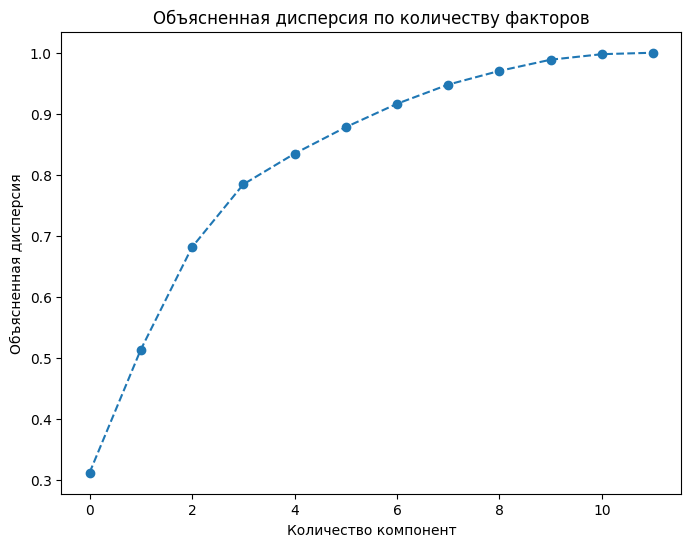

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Количество компонент')
plt.ylabel('Объясненная дисперсия')
plt.title('Объясненная дисперсия по количеству факторов')
plt.show()

#### Методы выбора количества факторов

##### Кумулятивная объясненная дисперсия

* 3 компоненты объясняют 66% дисперсии.
* 4 компоненты объясняют 76% дисперсии.
* 5 компонент объясняют 82% дисперсии (обычно это минимальный рекомендуемый порог).
* 6 компонент объясняют 86%, что также подходит.

Вывод: Минимально достаточное количество факторов: 5, если использовать правило 70-85%.

##### Метод "колена" (Scree Plot)

На графике объясненной дисперсии (scree plot) визуально ищут "колено" — точку, после которой добавление компонент приносит значительно меньше объясненной дисперсии.

В приведенных данных это может быть:
* Первое заметное замедление происходит после 3 компонент.
* После 5 компонент прирост дисперсии становится совсем незначительным.

Вывод: С точки зрения метода "колена", можно выбрать 3 или 5 факторов.

##### Учет задачи

Если цель — максимальная интерпретация данных с минимальной сложностью модели:
3 фактора, так как они объясняют около 66% дисперсии, и их достаточно для большинства задач интерпретации. 

Если требуется сохранить максимум информации:
5 факторов, так как они объясняют 82% дисперсии.

Рекомендация: Обычно выбирают компромиссное значение, например:
3 фактора, если стремитесь к упрощению.
5 факторов, если цель — максимально сохранить информацию.

#### Критерий каменистой осыпи

На графике вы смотрите на "излом": точку, начиная с которой собственные значения компонентов становятся небольшими и почти одинаковыми.  
До этой точки компоненты объясняют значимую часть дисперсии.  
После излома график "выравнивается", и дальнейшие компоненты объясняют мало информации.  

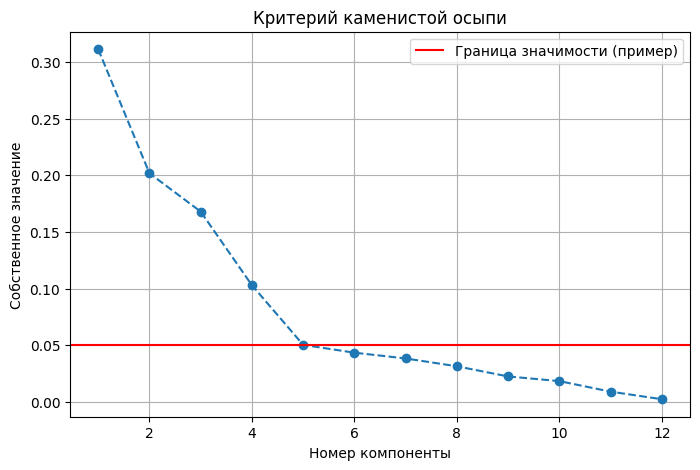

In [33]:
def plot_scree(eigenvalues):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
    plt.title('Критерий каменистой осыпи')
    plt.xlabel('Номер компоненты')
    plt.ylabel('Собственное значение')
    plt.axhline(y=0.05, color='r', linestyle='-', label='Граница значимости (пример)')
    plt.legend()
    plt.grid()
    plt.show()

plot_scree(explained_variance)

##### Критерий Кайзера

Согласно этому критерию, выбираются только те компоненты, чьи собственные значения больше 1.  
На графике это можно интерпретировать как компоненты, чьи точки выше красной линии.

In [ ]:
def apply_kaiser_rule(eigenvalues):
    # Отбор факторов с собственными значениями > 1
    selected_factors = np.sum(eigenvalues > 1)
    return selected_factors

kaiser_factors = apply_kaiser_rule(data_preprocessed)
print(f"Количество факторов по критерию Кайзера:\n{kaiser_factors}")

Количество факторов по критерию Кайзера:
age          51
trestbps     51
chol         46
thalach      47
cp_1          0
cp_2          0
cp_3          0
restecg_1     0
restecg_2     0
sex           0
fbs           0
exang         0
dtype: int64


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Излом здесь может быть примерно на первых нескольких компонентах, так как далее собственные значения "выравниваются" вокруг нуля.  
Точное количество факторов нужно уточнить, но, судя по общему виду, значимыми могут быть 3-5 первых факторов.

### Функция для факторного анализа + теория

#### Объяснение происходящего

**Матрица факторных нагрузок** — это таблица, которая показывает, насколько каждая из исходных переменных связана с выделенными факторами. Каждая ячейка этой матрицы представляет собой коэффициент факторной нагрузки, который можно интерпретировать как вклад или степень связи переменной с фактором.

Структура матрицы факторных нагрузок:
* Столбцы: Представляют выделенные факторы (например, Factor 1, Factor 2, ...).
* Строки: Представляют исходные переменные (например, age, chol, sex, ...).
* Элементы матрицы: Числовые значения, которые показывают силу и направление связи между переменной и фактором.

Числовые зависмости факторов и влияния на них переменных
* Если нагрузка велика (например, выше 0.7), переменная тесно связана с фактором.
* Если нагрузка мала (например, ниже 0.3), переменная слабо связана с фактором.
* Знак нагрузки (положительный или отрицательный) указывает направление связи.

**Что такое вращение факторов?**  
Вращение факторов (rotation) — это метод математического преобразования, который улучшает интерпретируемость факторов. Оно не меняет математического смысла модели, но перераспределяет нагрузки так, чтобы каждый фактор в большей степени был связан с определенной группой переменных.  

**Какое вращение будет использоваться?**  
Ортогональное вращение (Orthogonal):  
* Факторы остаются независимыми (перпендикулярными).
* Пример: Varimax (самый популярный метод).
* Упрощает структуру, делает факторы легко интерпретируемыми.

#### Функция

In [35]:
def facrotr_analyz( n_factors, rotation, data = data_preprocessed):
    fa = FactorAnalyzer(n_factors=n_factors, rotation=rotation)
    fa.fit(data)
    loadings = fa.loadings_

    return pd.DataFrame(
        loadings,
        index=data.columns,
        columns=[f'Factor {i+1}' for i in range(n_factors)]
    ), fa.transform(data_preprocessed)

### Факторный анализ до вращения

#### 3 фактора

In [36]:
before_3_factor, score_before_3_factor = facrotr_analyz(3, None)
before_3_factor

,Factor 1,Factor 2,Factor 3
age,0.520365,0.308064,0.262565
trestbps,0.272782,0.162516,0.322332
chol,0.185084,0.117178,0.290292
thalach,-0.613989,-0.187474,0.287555
cp_1,-0.220930,-0.415693,0.214820
cp_2,-0.556721,0.835358,-0.106280
cp_3,0.078202,-0.075745,0.137654
restecg_1,-0.269011,-0.091932,-0.157614
restecg_2,0.137570,0.090111,0.047506
sex,0.048733,-0.143019,-0.265392


#### 5 факторов

In [20]:
before_5_factor, score_before_5_factor = facrotr_analyz(5, None)
before_5_factor

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
age,-0.430436,0.230452,0.303661,-0.225578,-0.031501
trestbps,-0.218862,0.085287,0.389620,-0.067996,0.153713
chol,-0.138568,0.094991,0.201192,-0.329004,0.200592
thalach,0.802438,-0.269016,0.195273,0.067079,0.488290
cp_1,0.284073,-0.385134,-0.101168,-0.313851,-0.051878
cp_2,0.460102,0.865438,-0.044641,0.203030,0.060277
cp_3,-0.014019,-0.228946,0.623049,0.387254,-0.247755
restecg_1,0.243098,-0.041547,-0.203871,0.067478,-0.154466
restecg_2,-0.121465,0.085169,0.039885,-0.125472,-0.008837
sex,-0.161055,-0.188234,-0.160167,0.442074,0.094798


### Факторный анализ после вращения

#### 3 фактора

In [21]:
after_3_factor, score_after_3_factor = facrotr_analyz(3, 'varimax')
after_3_factor

,Factor 1,Factor 2,Factor 3
age,-0.171695,0.644029,-0.002412
trestbps,-0.036562,0.412738,-0.052708
chol,0.034821,0.354487,-0.072194
thalach,0.540671,-0.298176,-0.073946
cp_1,0.296806,-0.202841,-0.403351
cp_2,0.404993,0.015622,0.923006
cp_3,0.041132,0.073318,-0.133655
restecg_1,0.129533,-0.293056,0.051245
restecg_2,-0.050636,0.169293,0.010652
sex,-0.329908,-0.253432,0.003168


##### **Фактор 1**
thalach (0.540671) — максимальная частота сердцебиения  
cp_1 (0.296806) — типичная стенокардия  
cp_2 (0.404993) — атипичная стенокардия  
exang (-0.599360) — стенокардия при нагрузке (отрицательная связь)  
target (0.743385) — наличие сердечно-сосудистого заболевания  

##### **Фактор 2**
age (0.644029) — возраст  
trestbps (0.412738) — артериальное давление в покое  
chol (0.354487) — уровень холестерина  

##### **Фактор 3**
cp_2 (0.923006) — атипичная стенокардия.
Интерпретация:
Этот фактор в основном объясняет атипичную стенокардию, так как переменная cp_2 имеет почти идеальную нагрузку.


##### **Факторы складываются следующим образом**  
* Фактор 1 — Сердечная активность, диагноз и симптомы стенокардии.
* Фактор 2 — Метаболические и возрастные риски.
* Фактор 3 — Специфическая связь с атипичной стенокардией.

#### 5 факторов

In [37]:
after_5_factor, score_after_5_factor = facrotr_analyz(5, 'varimax')
after_5_factor

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
age,-0.403706,-0.009136,0.010964,0.375792,0.317544
trestbps,-0.049388,-0.018837,0.028944,0.474323,0.179583
chol,-0.002170,-0.049965,0.071776,0.143626,0.481302
thalach,0.979340,0.020788,-0.197944,0.008521,0.007003
cp_1,0.216144,-0.364931,-0.204136,-0.277129,0.094292
cp_2,0.110172,0.975656,-0.169757,-0.081811,0.082026
cp_3,0.052329,-0.130115,-0.104757,0.428604,-0.243926
restecg_1,0.089647,0.052786,-0.086881,-0.264688,-0.162164
restecg_2,-0.122027,0.003094,0.023527,0.027041,0.156303
sex,-0.012961,-0.058701,0.129517,0.046941,-0.411296


##### **Фактор 1**
thalach (0.979340) — максимальная частота сердцебиения  
cp_1 (0.216144) — типичная стенокардия  
Интерпретация:  
Этот фактор связан с сердечной активностью и типичной стенокардией  

##### **Фактор 2**
cp_2 (0.975656) — атипичная стенокардия  
Интерпретация:  
Фактор почти полностью объясняется атипичной стенокардией

##### **Фактор 3**
exang (0.976526) — стенокардия при нагрузке  
Интерпретация:  
Этот фактор объясняет стенокардию при физической нагрузке

##### **Фактор 4**
age (0.375792) — возраст  
trestbps (0.474323) — артериальное давление в покое  
cp_3 (0.428604) — другой вид боли в груди  
Интерпретация:  
Фактор связан с возрастом, артериальным давлением и другими типами боли в груди, что можно интерпретировать как возрастные и сердечно-сосудистые риски

##### **Фактор 5**
chol (0.481302) — уровень холестерина  
sex (-0.411296) — пол  
Интерпретация:  
Фактор связан с метаболическими показателями (холестерин) и полом пациента.

##### **Факторы складываются следующим образом**  
Фактор 1: Сердечная активность (максимальная частота сердцебиения)  
Фактор 2: Атипичная стенокардия  
Фактор 3: Стенокардия при нагрузке  
Фактор 4: Возрастные и сердечно-сосудистые риски  
Фактор 5: Метаболические показатели и пол пациента  


### Функция для построения диаграммы рассеивания + теория

#### Теория

**Что изображается на графиках?**

На диаграммах рассеяния (scatter plots) для факторов:
* Ось X отображает значения первого фактора (например, Factor 1)
* Ось Y отображает значения второго фактора (например, Factor 2)

Каждая точка на графике представляет собой одно наблюдение (объект из датасета)  
Таким образом, можно видеть взаимосвязь между двумя факторами для каждого пациента

**Как интерпретировать графики?**  

1. Линейная зависимость (точки вдоль прямой)  
Один фактор зависит от другого (положительная или отрицательная связь).  
Вывод: Эти факторы сильно связаны, и один может предсказать другой.

2. Равномерное распределение (нет явной зависимости)  
Нет значимой связи между факторами.  
Вывод: Эти факторы независимы, и каждый из них может влиять на целевую переменную по-своему.  

3. Группы или кластеры (точки собраны в несколько областей)  
Данные можно разделить на разные группы.  
Вывод: Возможно, стоит применить методы кластеризации или рассматривать эти группы отдельно.  

4. Плотность точек в одной области  
Большинство наблюдений находятся в одном диапазоне значений.  
Вывод: Это может означать, что большинство данных имеют схожие характеристики, но есть редкие исключения.  

5. Нелинейная зависимость (кривая)  
Между факторами есть сложная, нелинейная связь.  
Вывод: Для анализа нужно использовать нелинейные модели.  

6. Кластеризация по осям (доминирующий фактор)  
Один фактор сильно влияет на другие.  


#### Функция

In [23]:
def draw_diagram(n_factors, factor_scores):
    for i in range(n_factors):
        for j in range(i+1, n_factors):
            plt.figure(figsize=(8, 6))
            plt.scatter(factor_scores[:, i], factor_scores[:, j])
            plt.xlabel(f'Factor {i+1}')
            plt.ylabel(f'Factor {j+1}')
            plt.title(f'Scatter plot of Factor {i+1} vs Factor {j+1}')
            plt.show()

### Диаграммы рассеивания до вращения

#### 3 фактора

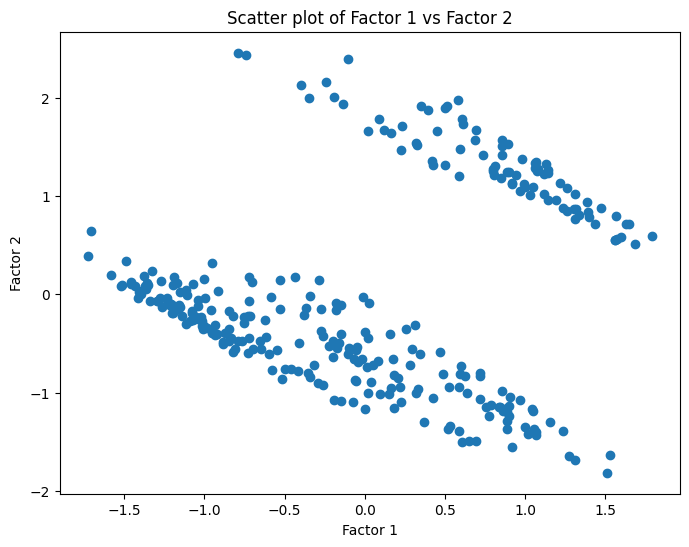

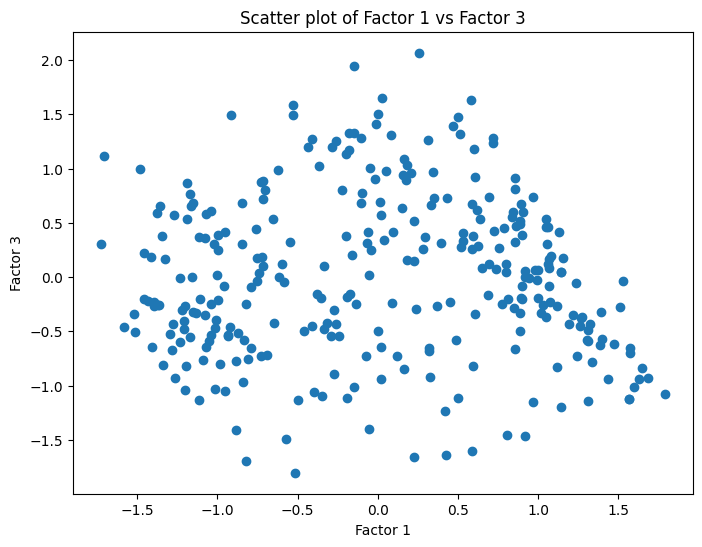

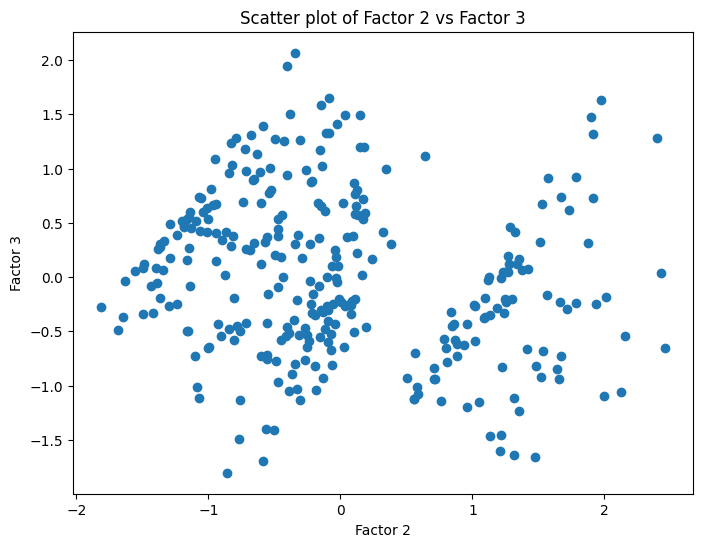

In [24]:
draw_diagram(3, score_before_3_factor)

#### 5 факторов

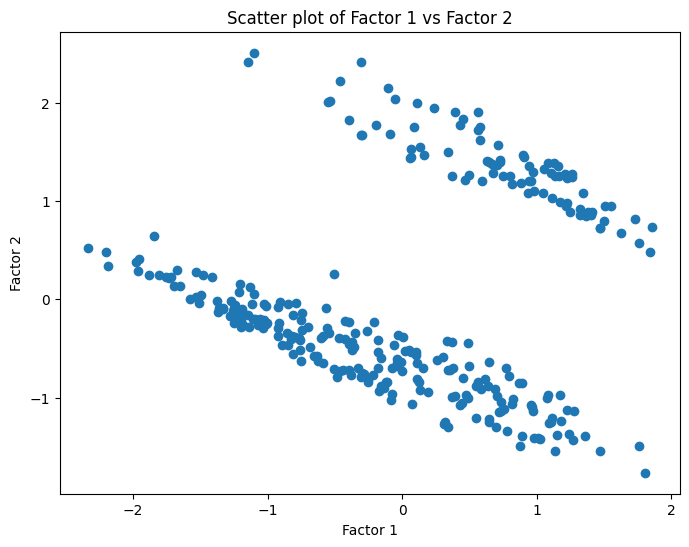

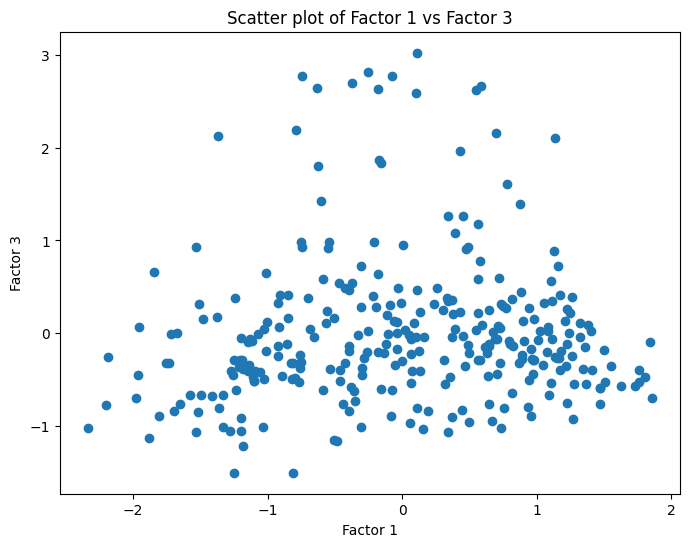

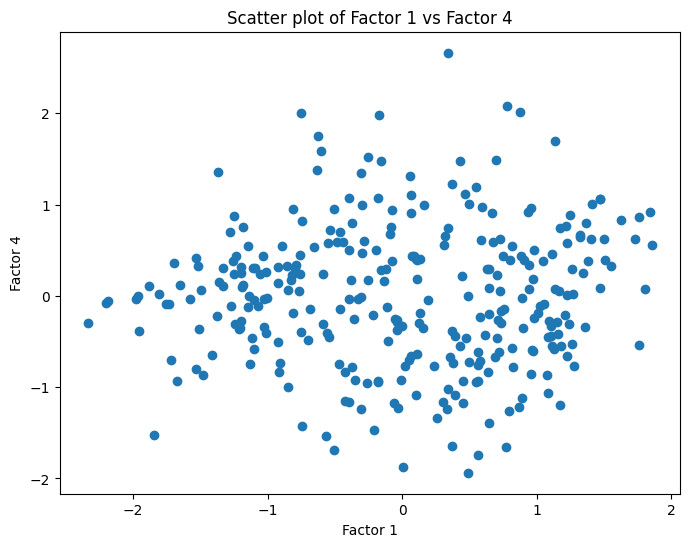

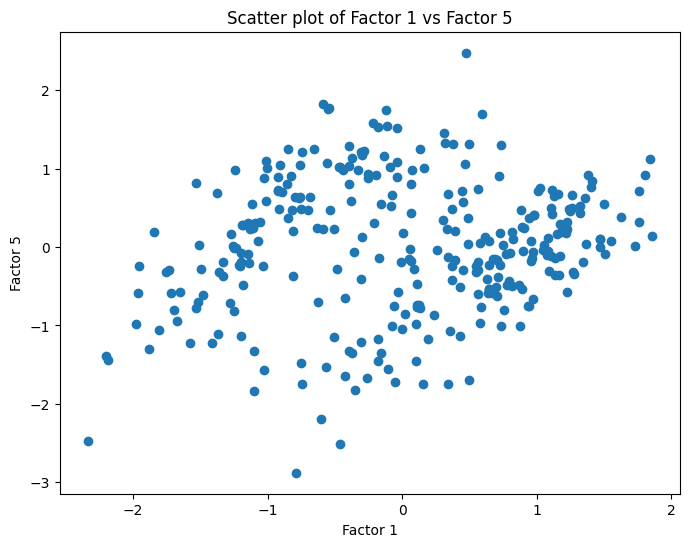

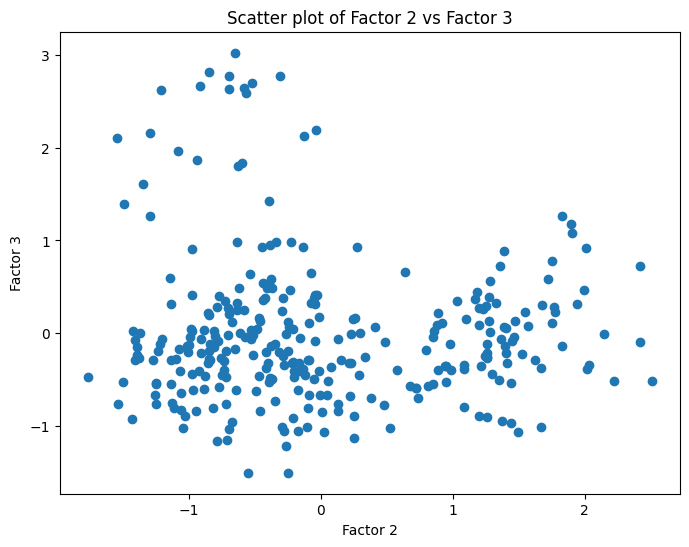

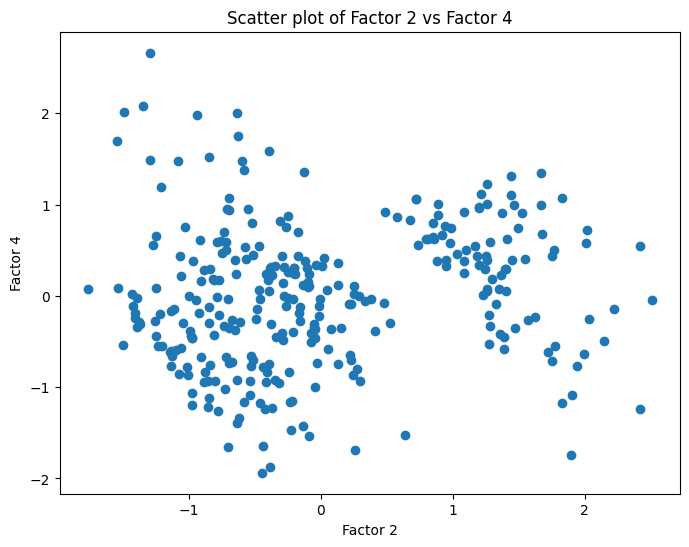

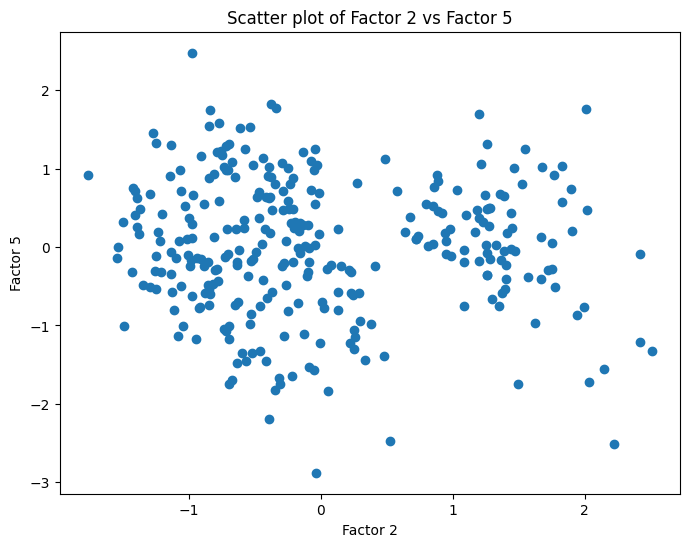

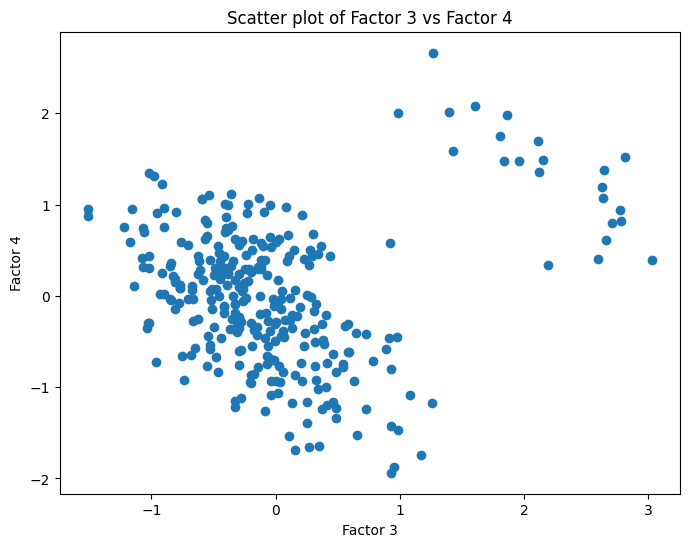

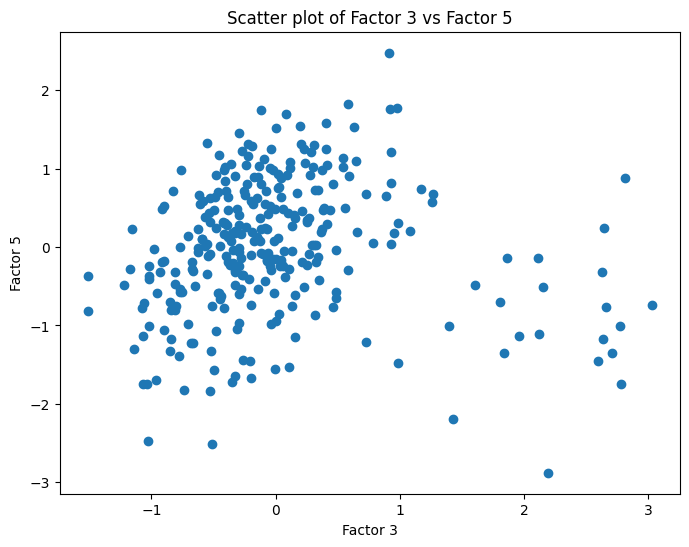

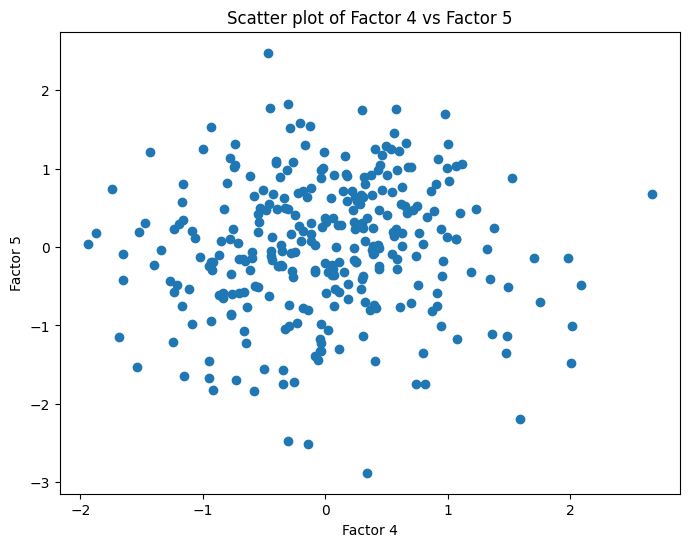

In [25]:
draw_diagram(5, score_before_5_factor)

### Диаграммы рассеивания после вращения

#### 3 фактора

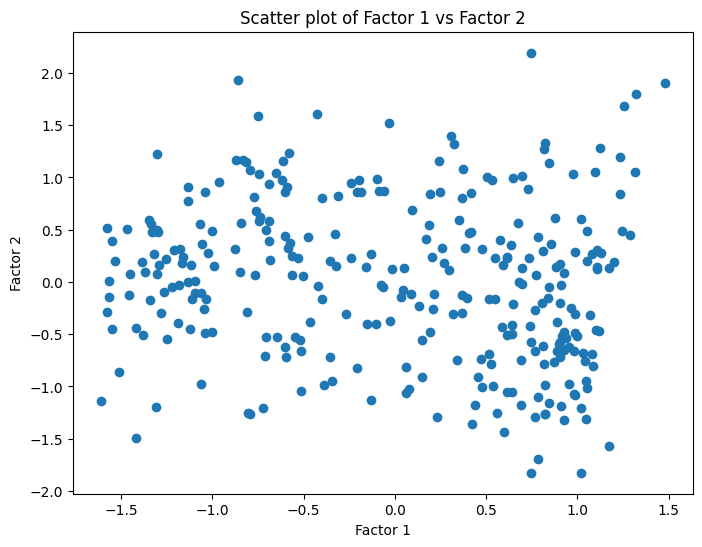

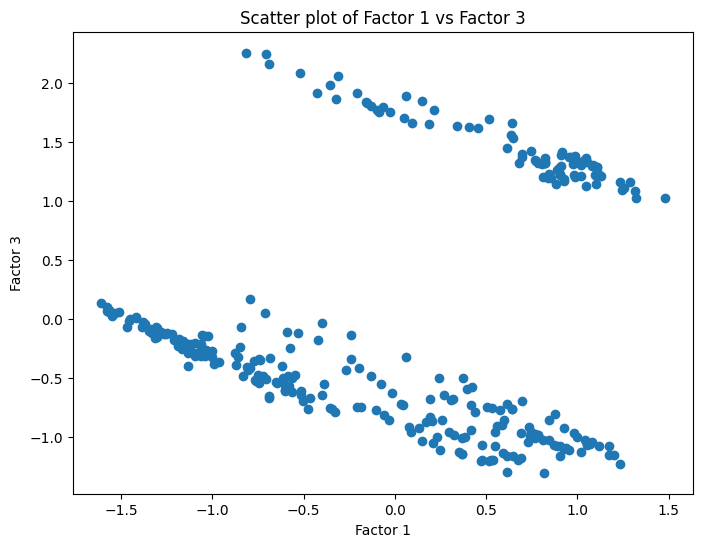

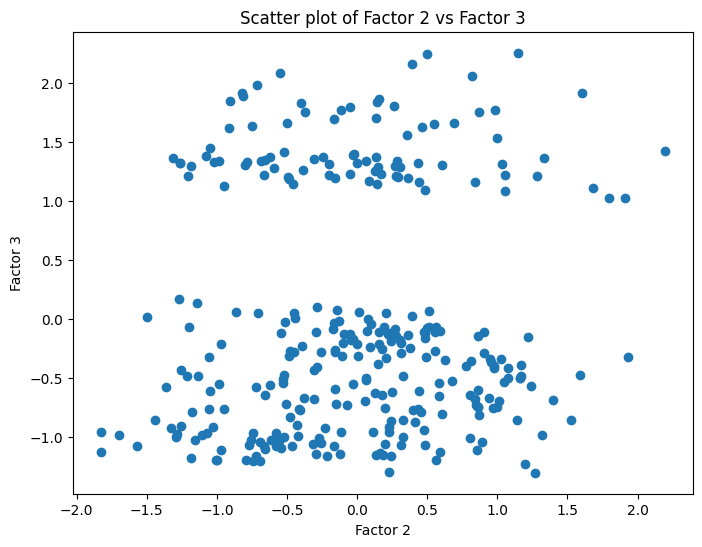

In [26]:
draw_diagram(3, score_after_3_factor)

#### 5 факторов

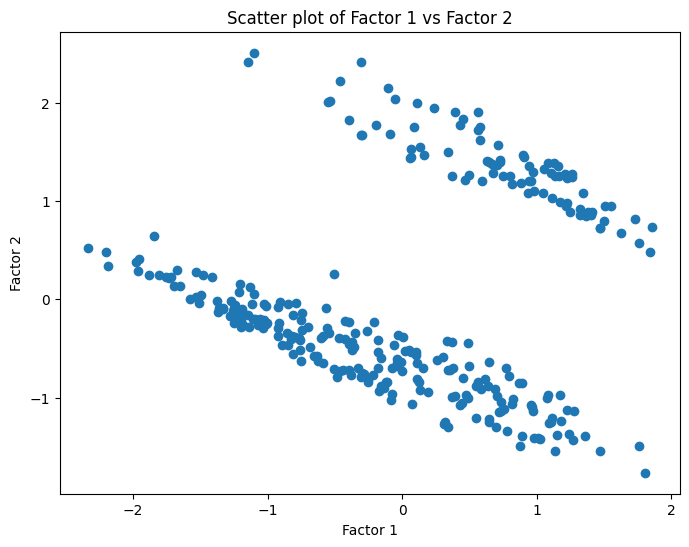

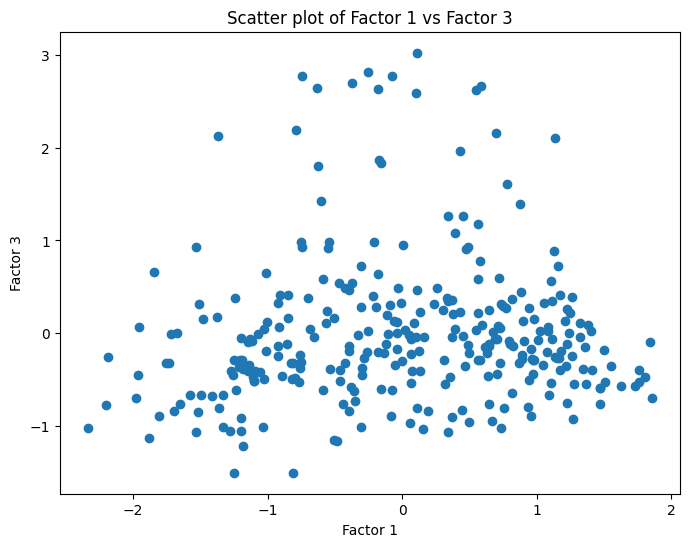

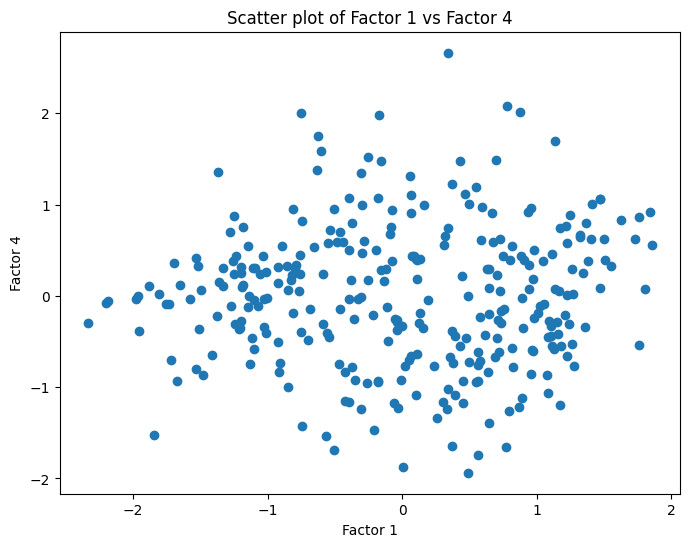

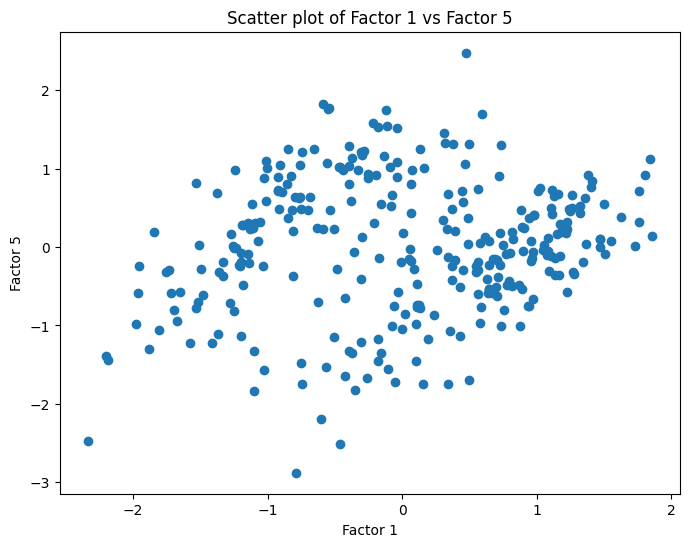

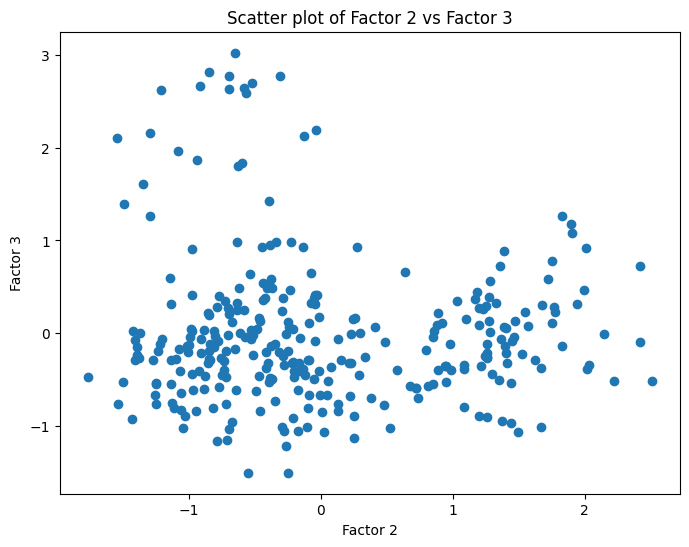

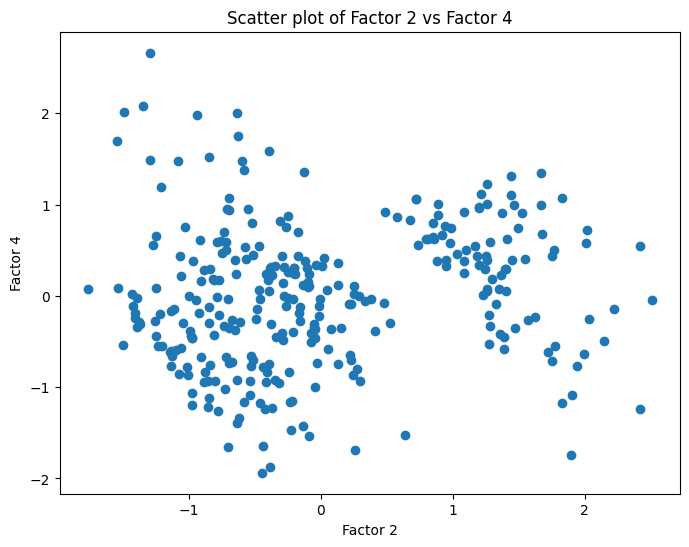

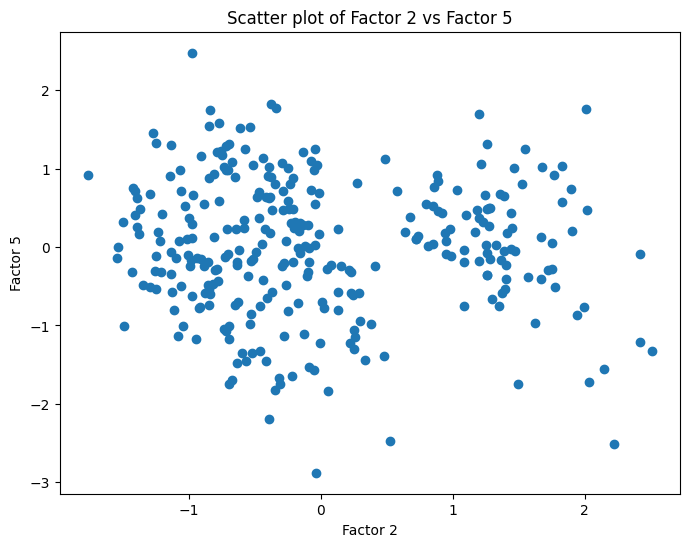

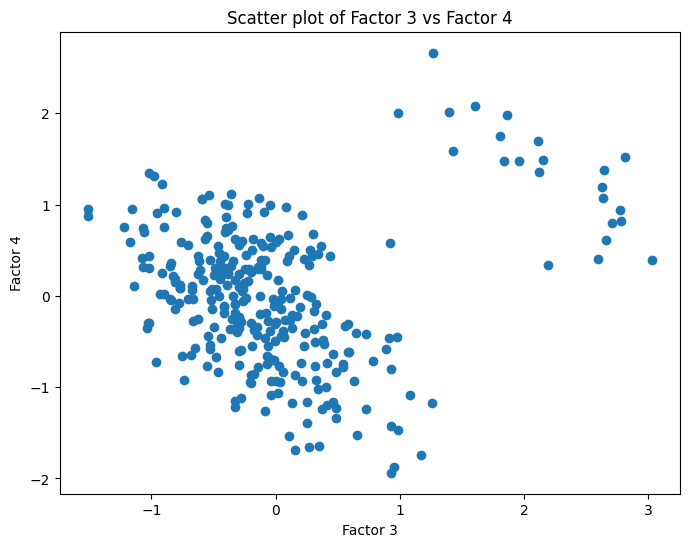

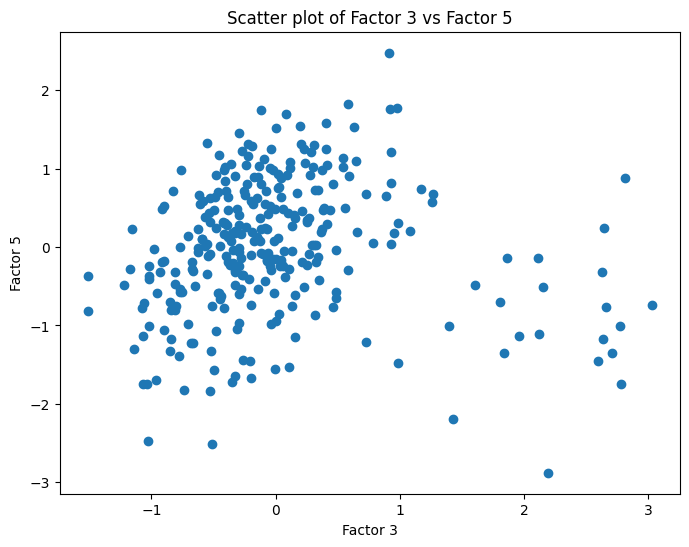

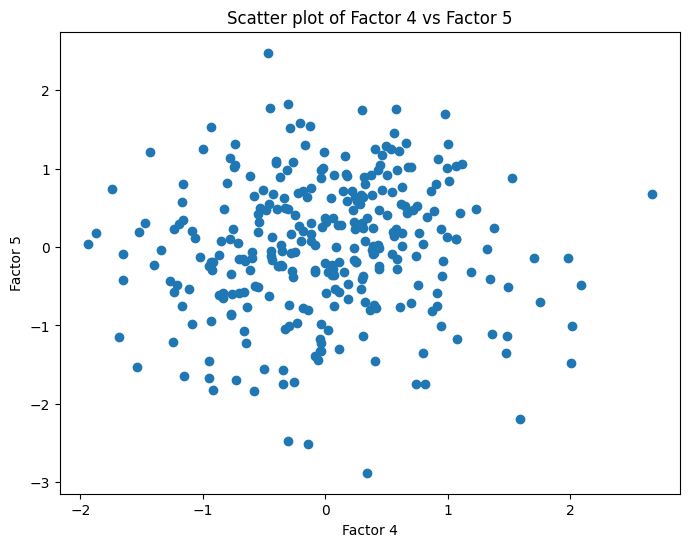

In [27]:
draw_diagram(5, score_before_5_factor)

## Интерпретация результатов

1. **Определение количества факторов:**
   - По критерию Кайзера значимыми оказались только те факторы, где собственные значения больше 1. Согласно этому критерию, в данных есть **5 факторов**, так как первые пять собственных значений превышают порог 1.
   - Это подтверждается долей объясненной дисперсии: первые 5 факторов объясняют ~83.4% общей вариации данных (0.311 + 0.202 + 0.168 + 0.103 + 0.050 = 0.834).

2. **Интерпретация факторов:**
   - Каждый фактор можно связать с конкретными характеристиками данных:
     - **Фактор 1:** Связан с максимальной частотой сердцебиения и наличием сердечно-сосудистого заболевания. Это можно интерпретировать как сердечную активность и проявления заболеваний.
     - **Фактор 2:** Отражает метаболические риски (влияние возраста, артериального давления и уровня холестерина).
     - **Фактор 3:** Влияет на стенокардию при нагрузке.
     - **Фактор 4:** Определяется возрастом, давлением и другими типами боли в груди.
     - **Фактор 5:** Указывает на связь уровня холестерина и половой принадлежности пациента.

3. **Анализ графика зависимости факторов (Фактор 1 и Фактор 2 с 5 факторами):**
   - На графике видна четкая структура данных. Наблюдения группируются в две основные линии:
     - **Первая линия**: Вероятно, представляет группу пациентов с схожими характеристиками по обоим факторам (например, более выраженные симптомы сердечных заболеваний и метаболических рисков).
     - **Вторая линия**: Может соответствовать другой группе пациентов, у которых данные факторы проявляются менее сильно или в иной комбинации.
   - Вероятное объяснение двух линий — это разделение пациентов на подгруппы (например, по тяжести заболевания или другим характеристикам).
   - На остальных графиках видна либо та же ситуация, либо отсутствует зависимость

4. **Потенциальные выводы:**
   - Первый фактор (сердечная активность и связанные симптомы) объясняет наибольшую долю дисперсии, что подчеркивает его значимость для исследования сердечно-сосудистых заболеваний.
   - Второй фактор (метаболические риски) тоже вносит большой вклад, показывая важность учета возрастных и метаболических параметров при анализе данных о пациентах.
   - Структура факторов и их визуализация позволяют выделить подгруппы пациентов, что может быть полезно для диагностики и персонализированного лечения.

5. **Общие замечания:**
   - Несмотря на пять выделенных факторов, важно учитывать, что остальные факторы имеют менее выраженное влияние, но могут вносить небольшой вклад в объяснение вариации данных.
   - Факторная структура указывает на то, что данные хорошо поддаются интерпретации через выделенные признаки, что говорит о качественно проведенном анализе.